# Logistic Regression Application - Credit Card Fraud

#### Adolfo F. Calderon
#### 12/26/2022

In this project I'll attempt to classify transactions that are likely to be fraudulent. I will be using a dataset based on the "Synthetic Financial Datasets For Fraud Detection" from Kaggle:
https://www.kaggle.com/datasets/ealaxi/paysim1

In [21]:
import seaborn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sns
    
# Load the data
transactions = pd.read_csv("transactions_modified.csv")

# How many fraudulent transactions?
print(transactions.head())
print(transactions.info())

# Summary statistics on amount column
print(transactions['amount'].describe())

# Create isPayment field
transactions['isPayment'] = 0
transactions['isPayment'].loc[transactions['type'].isin(["PAYMENT", "DEBIT"])] = 1

# Create isMovement field
transactions['isMovement'] = 0
transactions['isMovement'].loc[transactions['type'].isin(["CASH_OUT", "TRANSFER"])] = 1

# Create accountDiff field
transactions['accountDiff'] = abs(transactions['oldbalanceOrg'] - transactions['oldbalanceDest'])

# Create features and label variables
features = transactions[['amount', 'isPayment', 'isMovement', 'accountDiff']]
label = transactions['isFraud']

   step      type      amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0   206  CASH_OUT    62927.08   C473782114           0.00            0.00   
1   380   PAYMENT    32851.57  C1915112886           0.00            0.00   
2   570  CASH_OUT  1131750.38  C1396198422     1131750.38            0.00   
3   184  CASH_OUT    60519.74   C982551468       60519.74            0.00   
4   162   CASH_IN    46716.01  C1759889425     7668050.60      7714766.61   

      nameDest  oldbalanceDest  newbalanceDest  isFraud  isPayment  \
0  C2096898696       649420.67       712347.75        0          0   
1   M916879292            0.00            0.00        0          1   
2  C1612235515       313070.53      1444820.92        1          0   
3  C1378644910        54295.32       182654.50        1          0   
4  C2059152908      2125468.75      2078752.75        0          0   

   isMovement  accountDiff  
0           1    649420.67  
1           0         0.00  
2           1    818679.85  


/Users/adolfo/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


0.8528571428571429
0.82


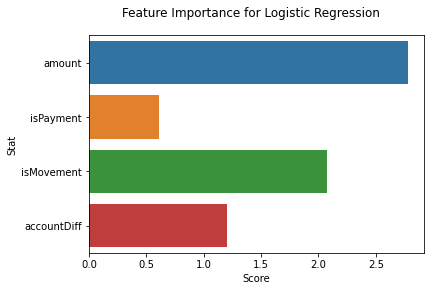

In [15]:
# Split dataset
x_train, x_test, y_train, y_test = train_test_split(features, label, test_size = 0.3)

# Normalize the features variables
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

# Fit the model to the training data
lr_model = LogisticRegression()
lr_model.fit(x_train, y_train)

# Score the model on the training data
score_train = lr_model.score(x_train, y_train)
print(score_train)
# Score the model on the test data
score_test = lr_model.score(x_test, y_test)
print(score_test)

# Print the model coefficients
importance = abs(lr_model.coef_[0])

sns.barplot(x=importance, y=features.columns)
plt.suptitle('Feature Importance for Logistic Regression')
plt.xlabel('Score')
plt.ylabel('Stat')
plt.show()

In [16]:
# New transaction data
transaction1 = np.array([123456.78, 0.0, 1.0, 54670.1])
transaction2 = np.array([98765.43, 1.0, 0.0, 8524.75])
transaction3 = np.array([543678.31, 1.0, 0.0, 510025.5])

# Create a new transaction
transaction1 = np.array([123456.78, 0.0, 1.0, 54670.1])
transaction2 = np.array([98765.43, 1.0, 0.0, 8524.75])
transaction3 = np.array([543678.31, 1.0, 0.0, 510025.5])
my_transaction = np.array([343678.31, 1.0, 0.0, 414525.5])


# Combine new transactions into a single array
sample_transactions = np.stack([transaction1, transaction2, transaction3, my_transaction])

# Normalize the new transactions
sample_transactions = scaler.transform(sample_transactions)


# Predict fraud on the new transactions
lr_model.predict(sample_transactions)

# Show probabilities on the new transactions
print(lr_model.predict_proba(sample_transactions))

[[0.60742359 0.39257641]
 [0.99805944 0.00194056]
 [0.99545992 0.00454008]
 [0.99704327 0.00295673]]
